In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ckd_data = pd.read_csv("C:\project AB6\DataSets\kidney_disease.csv")
ckd_data.head()




,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
ckd_data.shape

(400, 26)

In [8]:
# rename column names to make it more user-friendly

ckd_data.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
ckd_data.head()


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [10]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# Assuming ckd_data is your DataFrame
# Converting specified columns to numerical type
ckd_data['packed_cell_volume'] = pd.to_numeric(ckd_data['packed_cell_volume'], errors='coerce')
ckd_data['white_blood_cell_count'] = pd.to_numeric(ckd_data['white_blood_cell_count'], errors='coerce')
ckd_data['red_blood_cell_count'] = pd.to_numeric(ckd_data['red_blood_cell_count'], errors='coerce')
ckd_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [11]:
ckd_data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

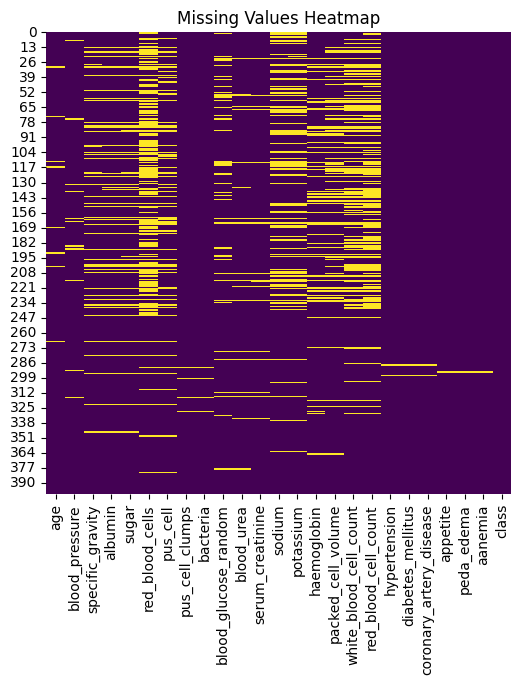

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
if 'id' in ckd_data.columns:
    ckd_data = ckd_data.drop('id', axis=1)

sns.heatmap(ckd_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [13]:
cat_cols = [col for col in ckd_data.columns if ckd_data[col].dtype == 'object']
num_cols = [col for col in ckd_data.columns if ckd_data[col].dtype != 'object']

In [14]:
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
Categorical columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [15]:

ckd_data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [16]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {ckd_data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [17]:
#There is some ambugity present in the columns we have to remove that.

# replace incorrect values

ckd_data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

ckd_data['coronary_artery_disease'] = ckd_data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

ckd_data['class'] = ckd_data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
ckd_data['class'] = ckd_data['class'].map({'ckd': 0, 'not ckd': 1})
ckd_data['class'] = pd.to_numeric(ckd_data['class'], errors='coerce')

In [18]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {ckd_data[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



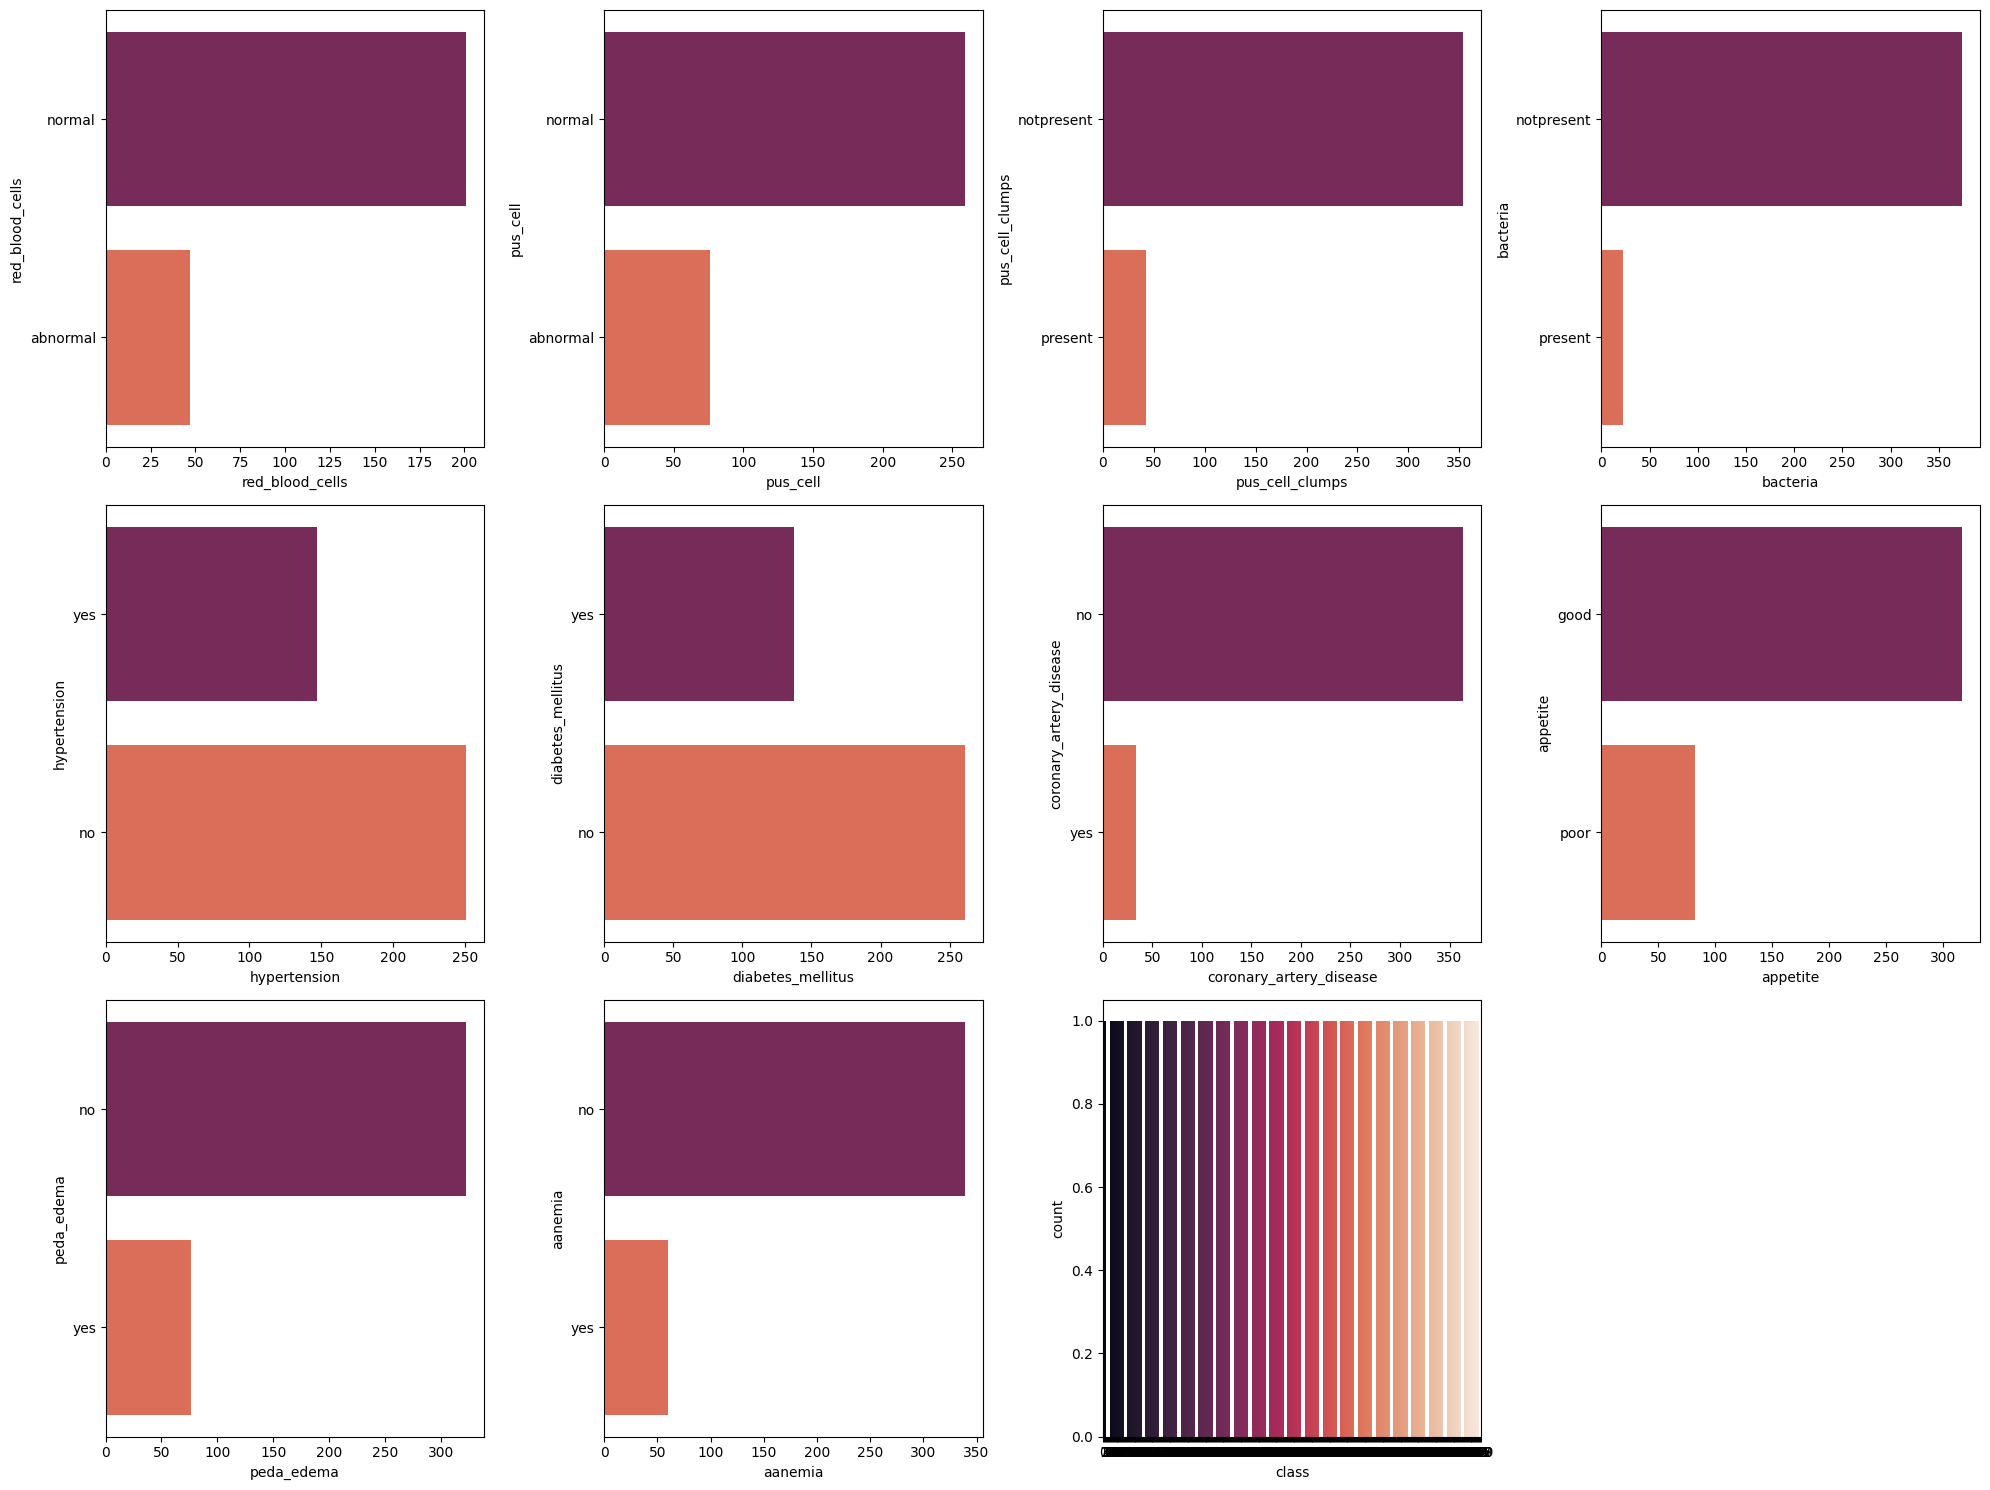

In [19]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(ckd_data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

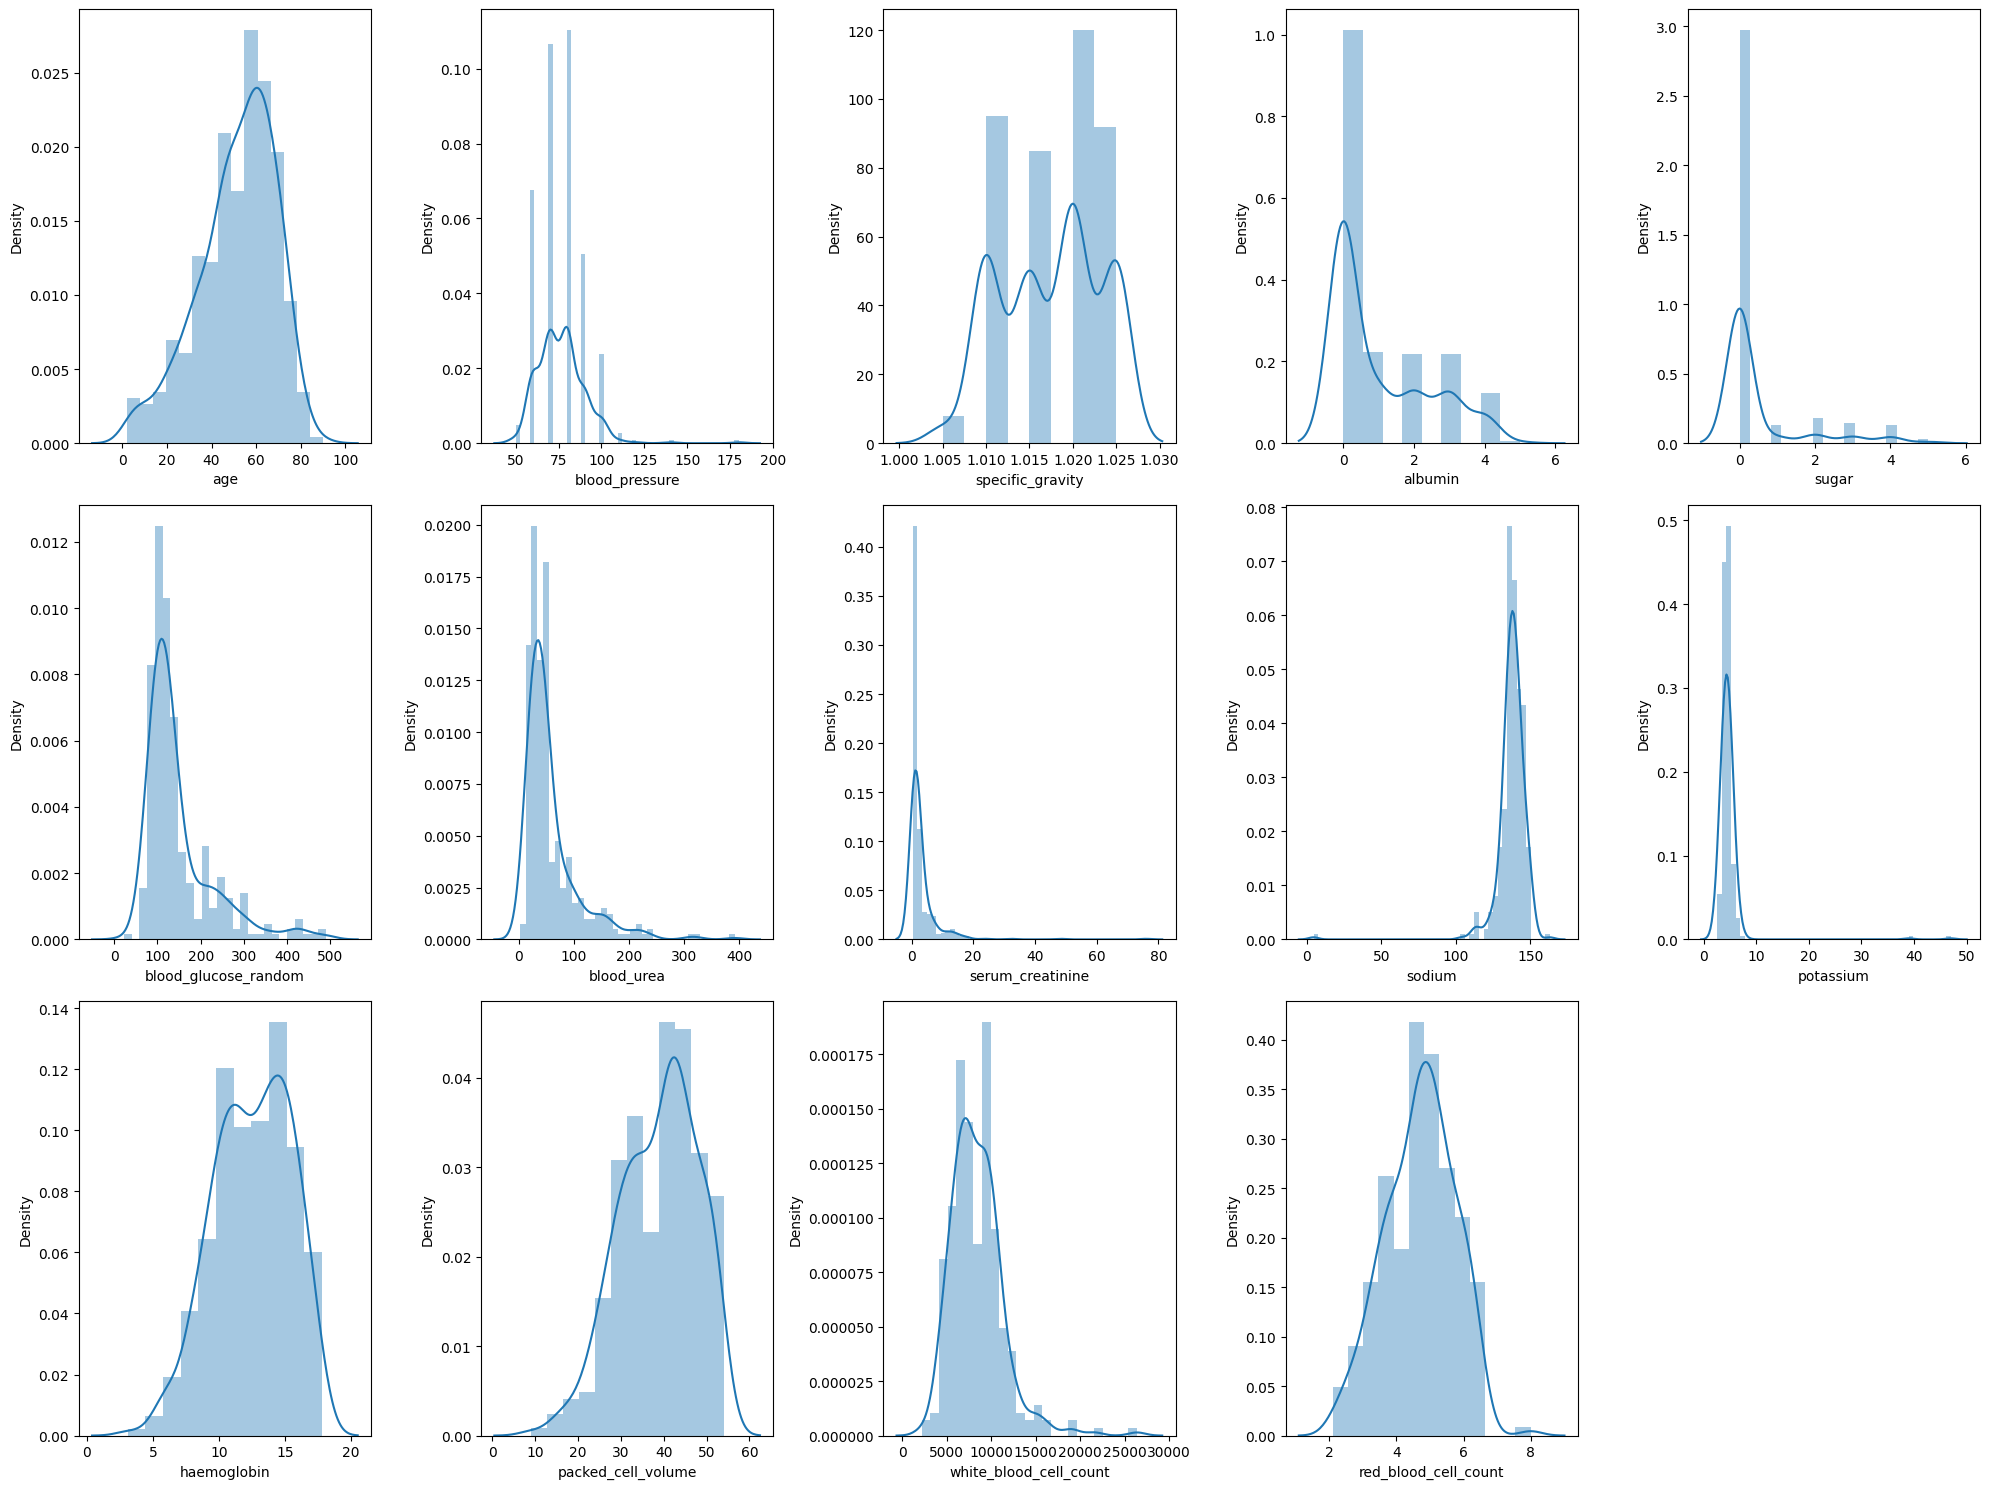

In [20]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(ckd_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [21]:
ckd_data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [22]:
ckd_data['age'].fillna(ckd_data['age'].mean(), inplace=True)
ckd_data['blood_pressure'].fillna(ckd_data['blood_pressure'].median(), inplace=True)
ckd_data['specific_gravity'].fillna(ckd_data['specific_gravity'].mean(), inplace=True)
ckd_data['albumin'].fillna(ckd_data['albumin'].mean(), inplace=True)
ckd_data['sugar'].fillna(ckd_data['sugar'].mean(), inplace=True)

In [23]:
ckd_data['blood_glucose_random'].fillna(ckd_data['blood_glucose_random'].mean(), inplace=True)
ckd_data['blood_urea'].fillna(ckd_data['blood_urea'].mean(), inplace=True)
ckd_data['serum_creatinine'].fillna(ckd_data['serum_creatinine'].mean(), inplace=True)
ckd_data['sodium'].fillna(ckd_data['sodium'].mean(), inplace=True)
ckd_data['potassium'].fillna(ckd_data['potassium'].mean(), inplace=True)
ckd_data['haemoglobin'].fillna(ckd_data['haemoglobin'].mean(), inplace=True)
ckd_data['packed_cell_volume'].fillna(ckd_data['packed_cell_volume'].mean(), inplace=True)
ckd_data['white_blood_cell_count'].fillna(ckd_data['white_blood_cell_count'].mean(), inplace=True)
ckd_data['red_blood_cell_count'].fillna(ckd_data['red_blood_cell_count'].mean(), inplace=True)

In [24]:
ckd_data.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

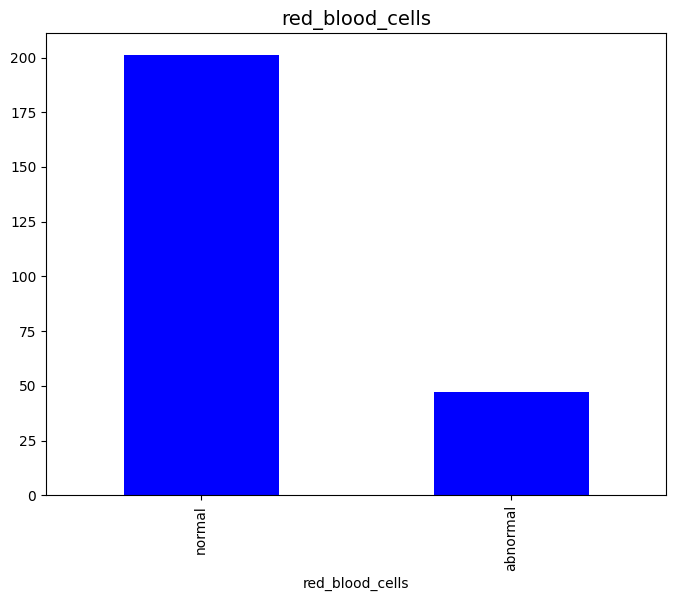

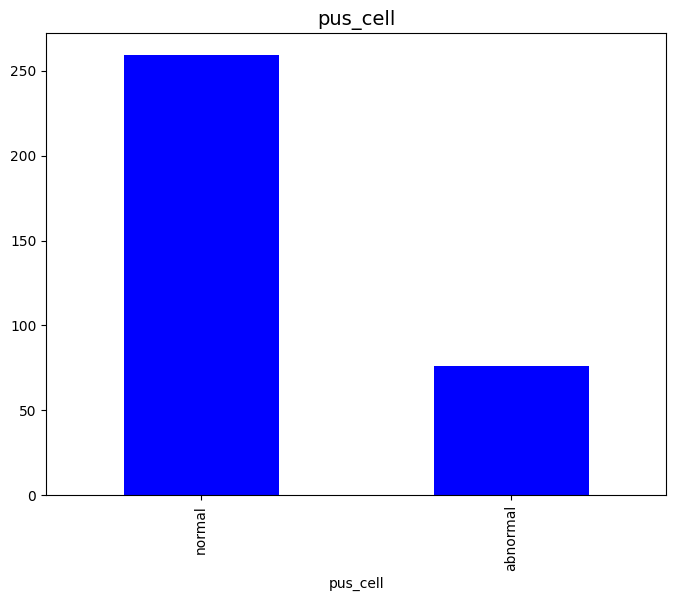

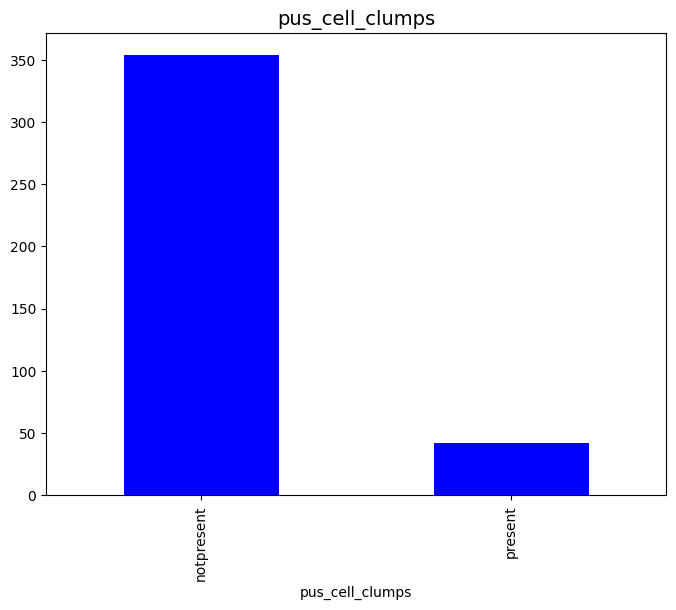

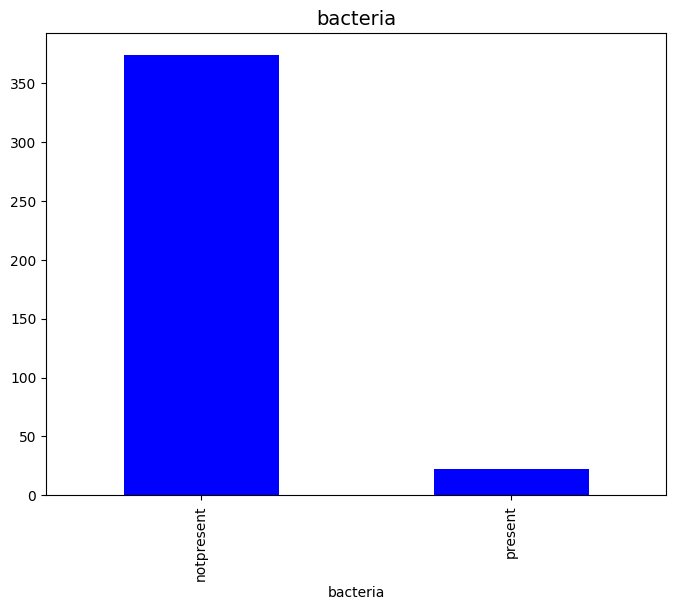

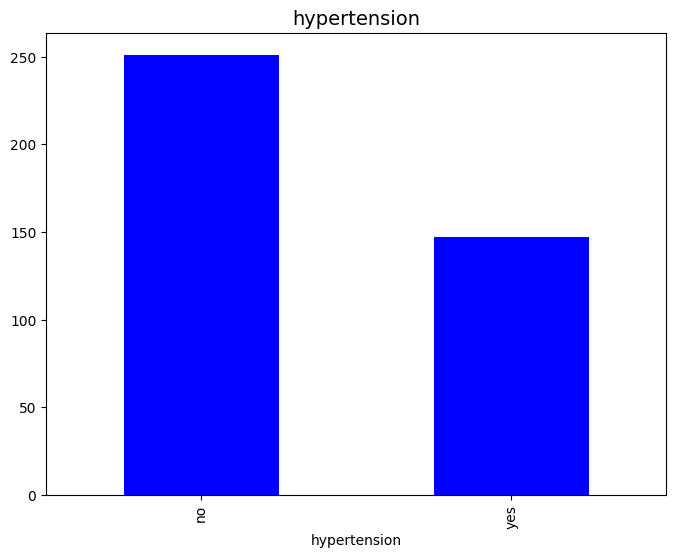

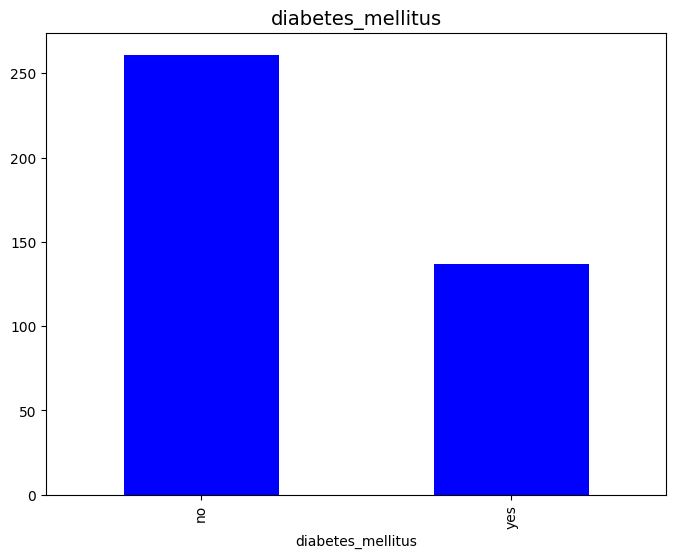

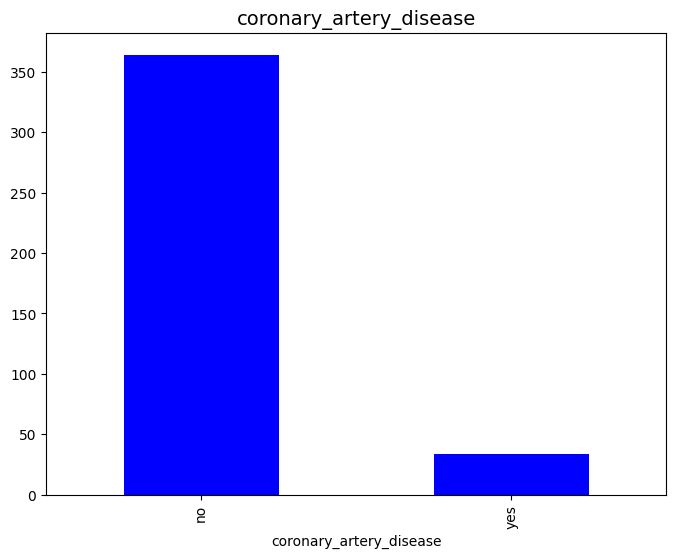

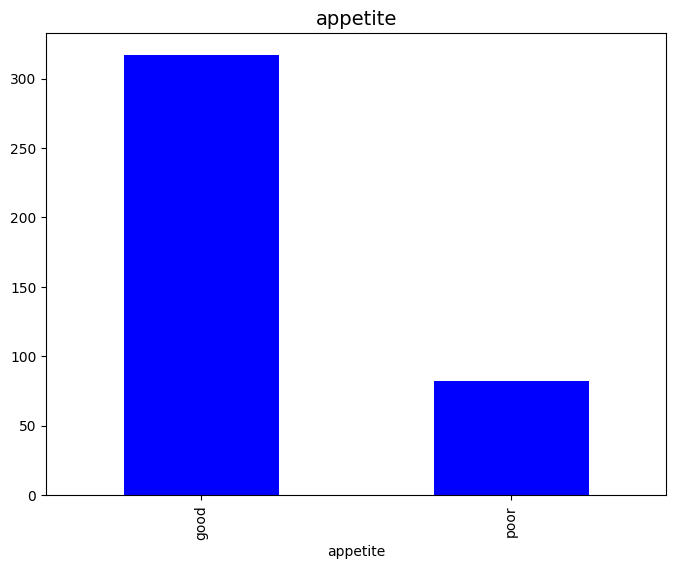

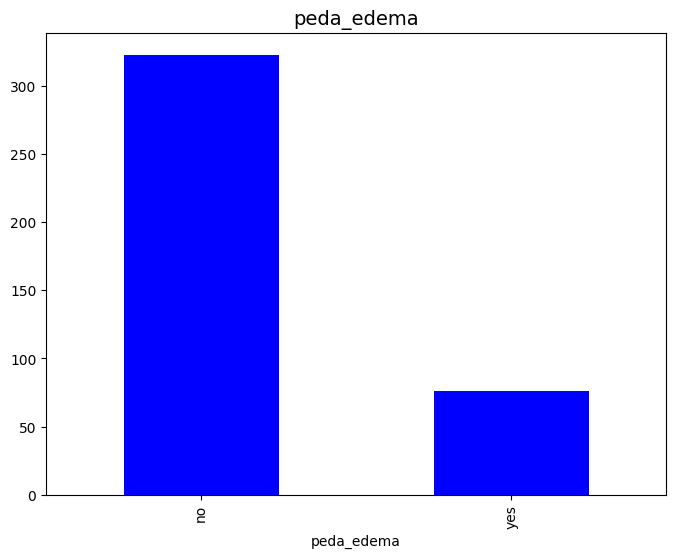

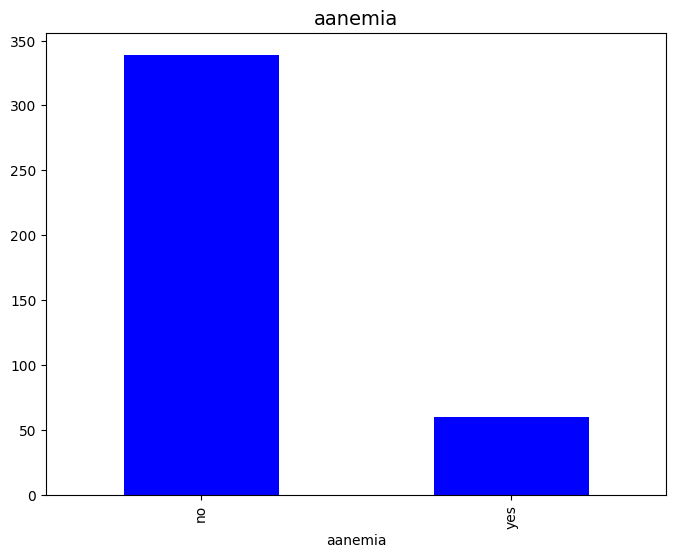

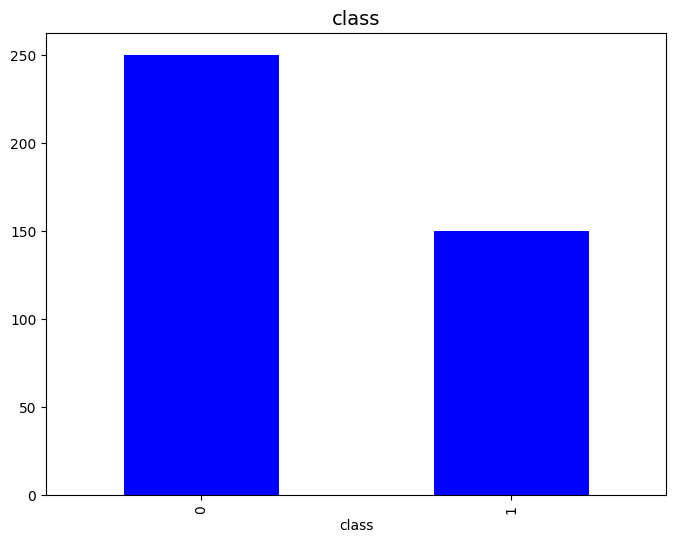

In [25]:
for col in cat_cols:
    plt.figure(figsize=(8,6))
    ckd_data[col].value_counts().plot(kind='bar', color='blue')
    plt.title(col, fontsize=14)
    plt.show()

In [26]:
for column in cat_cols:
    value_counts = ckd_data[column].value_counts()
    print(f'Value counts for {column}:\n{value_counts}\n')

Value counts for red_blood_cells:
red_blood_cells
normal      201
abnormal     47
Name: count, dtype: int64

Value counts for pus_cell:
pus_cell
normal      259
abnormal     76
Name: count, dtype: int64

Value counts for pus_cell_clumps:
pus_cell_clumps
notpresent    354
present        42
Name: count, dtype: int64

Value counts for bacteria:
bacteria
notpresent    374
present        22
Name: count, dtype: int64

Value counts for hypertension:
hypertension
no     251
yes    147
Name: count, dtype: int64

Value counts for diabetes_mellitus:
diabetes_mellitus
no     261
yes    137
Name: count, dtype: int64

Value counts for coronary_artery_disease:
coronary_artery_disease
no     364
yes     34
Name: count, dtype: int64

Value counts for appetite:
appetite
good    317
poor     82
Name: count, dtype: int64

Value counts for peda_edema:
peda_edema
no     323
yes     76
Name: count, dtype: int64

Value counts for aanemia:
aanemia
no     339
yes     60
Name: count, dtype: int64

Value counts f

In [27]:
ckd_data.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [28]:
duplicate_rows = ckd_data[ckd_data.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [29]:
target_var = 'class'

In [30]:

for col in cat_cols:
    print(f"{col} has {ckd_data[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#is used to convert categorical values into numerical labels, 
ckd_data['red_blood_cells'] = le.fit_transform(ckd_data['red_blood_cells'])
ckd_data['pus_cell'] = le.fit_transform(ckd_data['pus_cell'])
ckd_data['pus_cell_clumps'] = le.fit_transform(ckd_data['pus_cell_clumps'])
ckd_data['bacteria'] = le.fit_transform(ckd_data['bacteria'])
ckd_data['hypertension'] = le.fit_transform(ckd_data['hypertension'])
ckd_data['diabetes_mellitus'] = le.fit_transform(ckd_data['diabetes_mellitus'])
ckd_data['coronary_artery_disease'] = le.fit_transform(ckd_data['coronary_artery_disease'])
ckd_data['appetite'] = le.fit_transform(ckd_data['appetite'])
ckd_data['peda_edema'] = le.fit_transform(ckd_data['peda_edema'])
ckd_data['class'] = le.fit_transform(ckd_data['class'])
ckd_data['aanemia'] = le.fit_transform(ckd_data['aanemia'])

In [32]:
#ckd_data.head()

In [33]:
'''for col in cat_cols:
 sns.countplot(x=col, data=ckd_data)
 plt.show()'''
 


'for col in cat_cols:\n sns.countplot(x=col, data=ckd_data)\n plt.show()'

<Axes: >

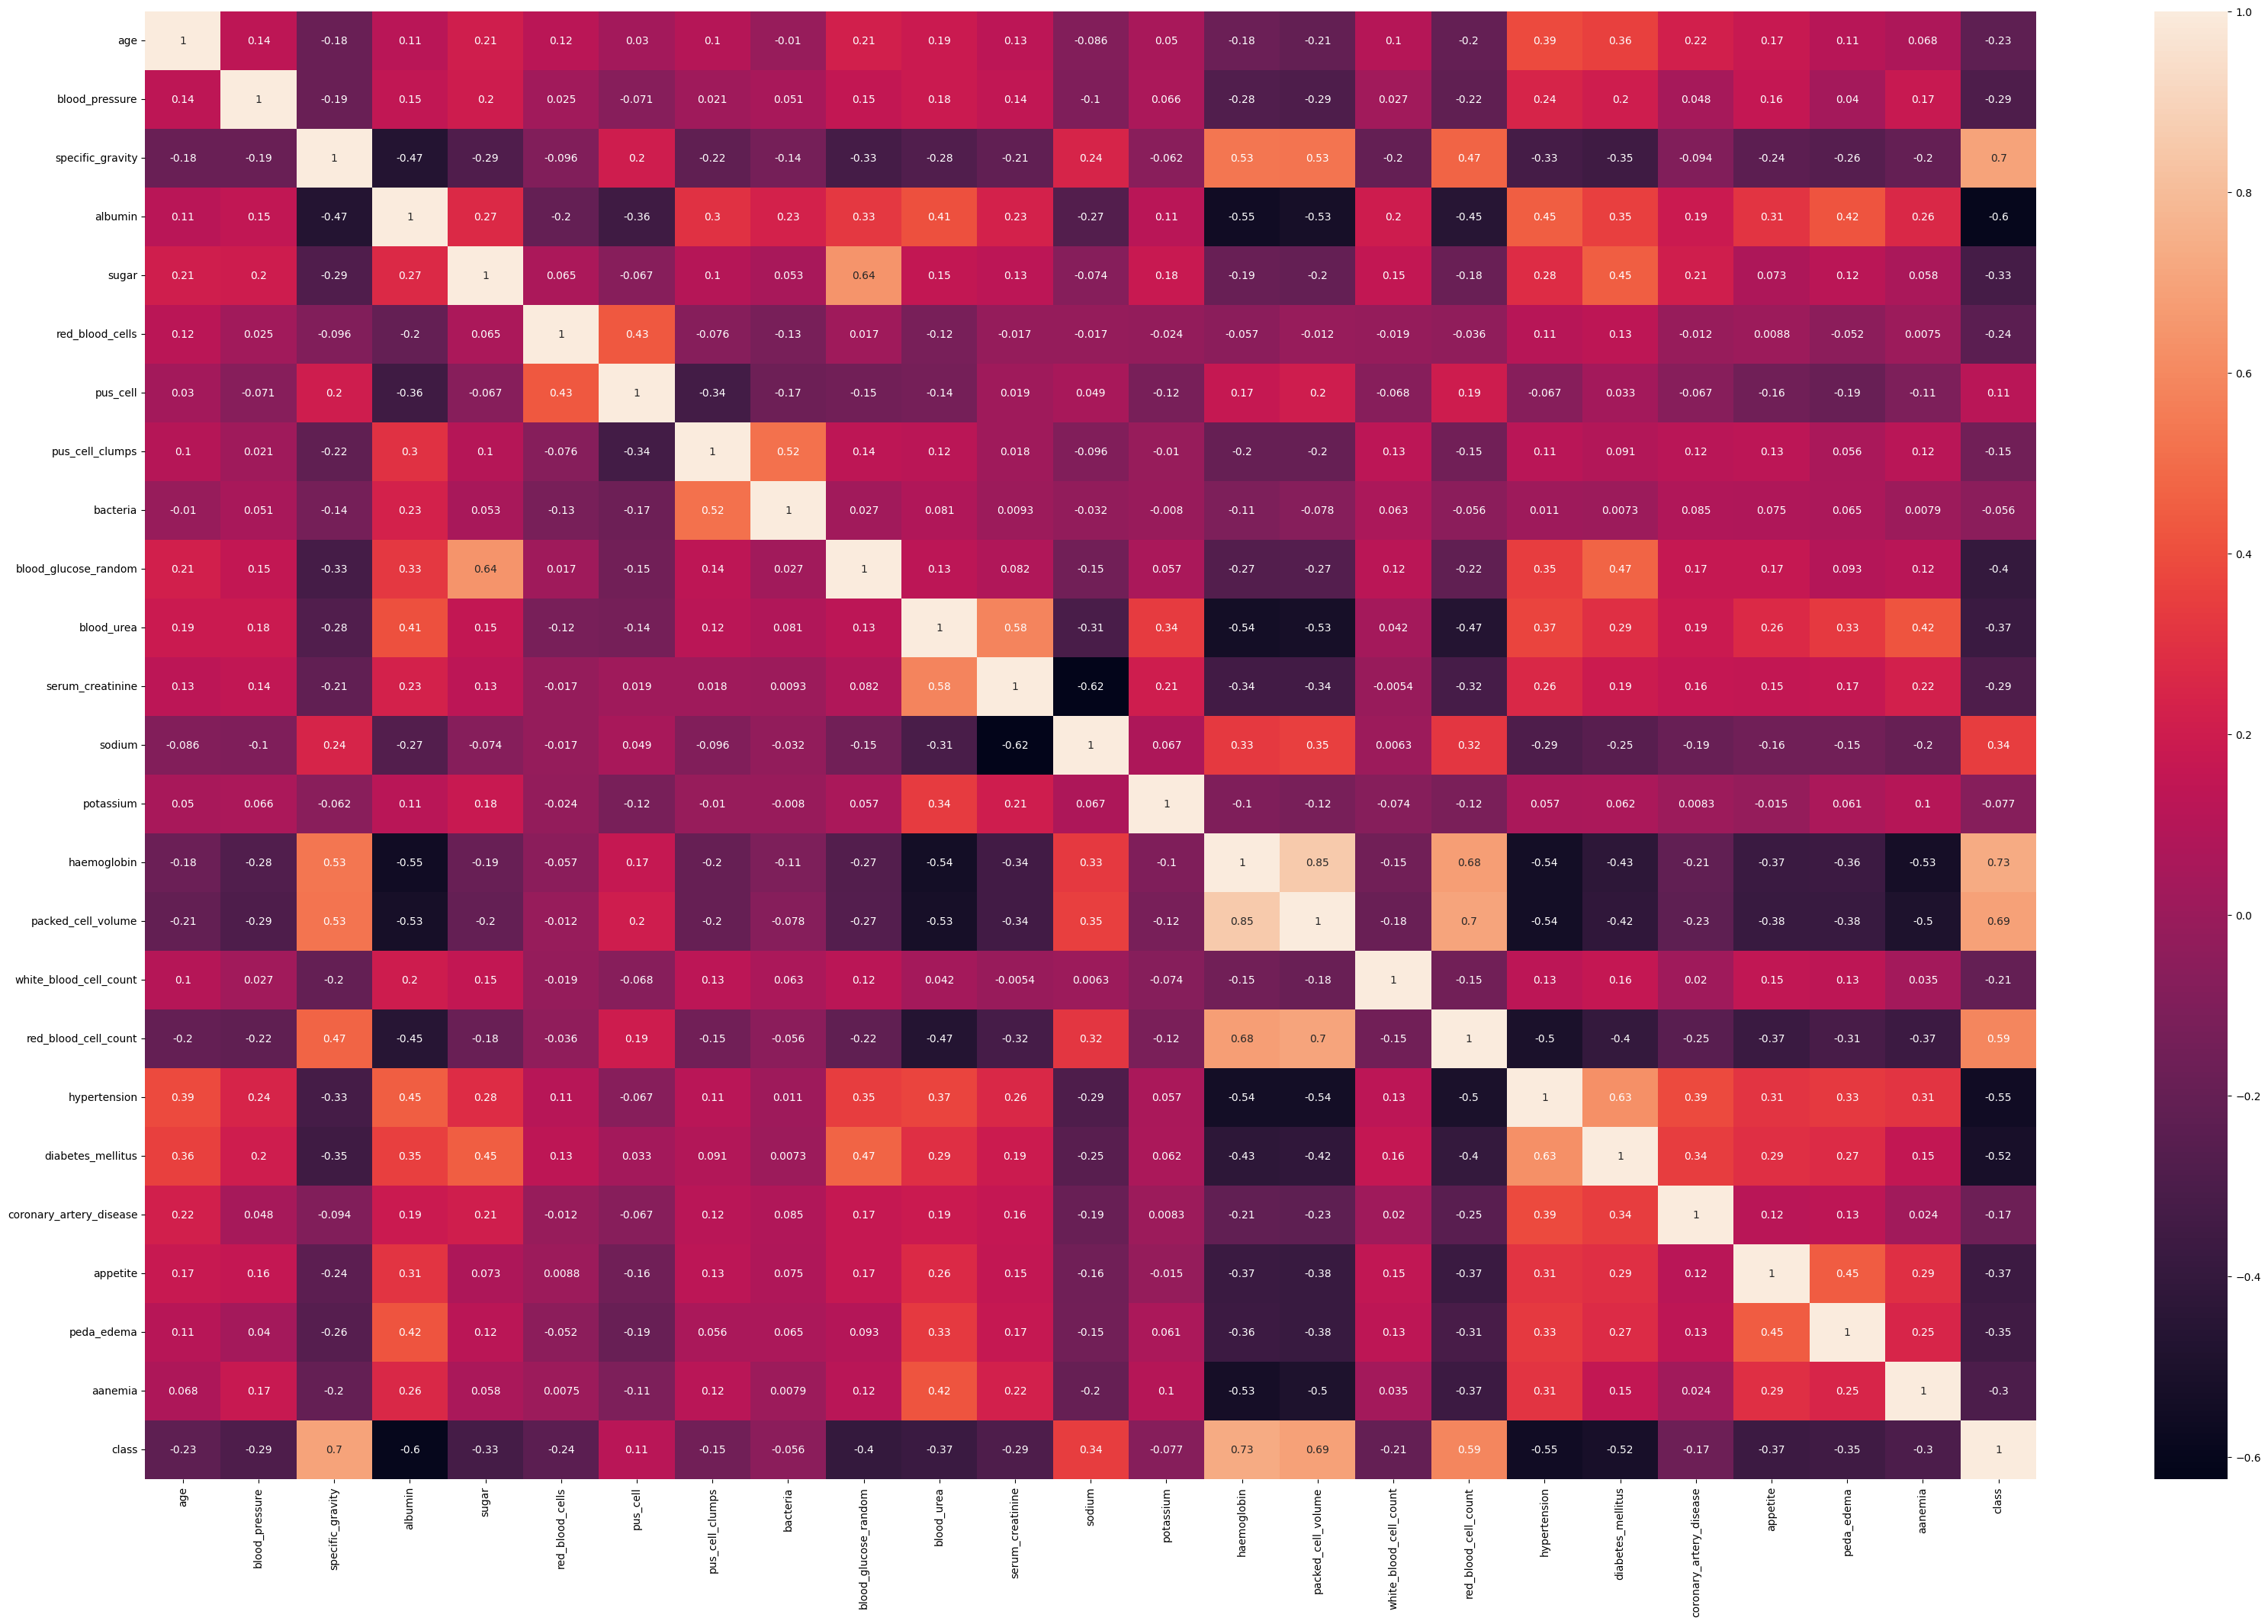

In [34]:
corr = ckd_data.corr()
plt.figure(figsize = (40,25))
sns.heatmap(corr, annot=True)

Data Modelling


In [35]:
ind_col=[col for col in ckd_data.columns if col!="class"]
def_col='class'
X=ckd_data[ind_col]
y=ckd_data[def_col]


In [36]:
%pip install imbalanced-learn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1,
                           flip_y=0, n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

print('Original dataset shape %s' % Counter(y))

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_resampled))


Original dataset shape Counter({np.int64(1): 900, np.int64(0): 100})
Resampled dataset shape Counter({np.int64(0): 900, np.int64(1): 900})


In [38]:
ind_col=[col for col in ckd_data.columns if col!="class"]
def_col='class'
X=ckd_data[ind_col]
y=ckd_data[def_col]


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((320, 24), (80, 24), (320,), (80,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Decision Tree


In [42]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dct = dct.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_dct))
print(classification_report(y_test, y_pred_dct))

[[25  1]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Decision tree Accuracy:", accuracy_score(y_test, y_pred_dct))
print("Precision:", precision_score(y_test, y_pred_dct, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dct, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dct, average='weighted'))

Decision tree Accuracy: 0.975
Precision: 0.9766666666666666
Recall: 0.975
F1-score: 0.9751859364435429


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
dt_acc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_acc, X_train,  y_train, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.97 (+/- 0.04)


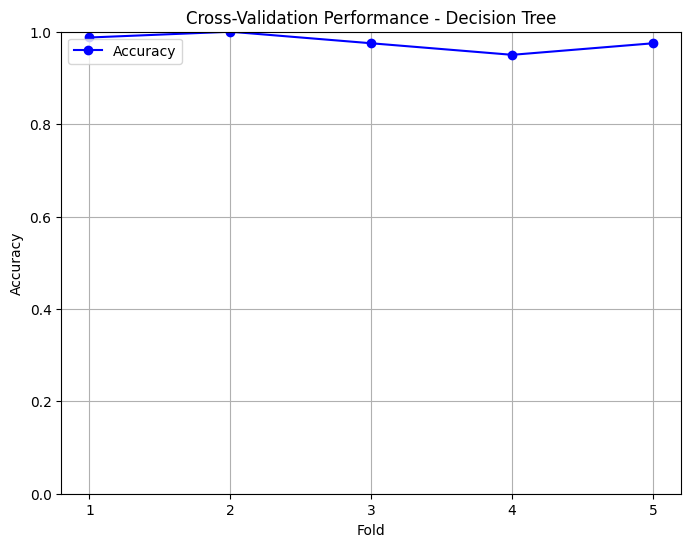

In [47]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
# Define the cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(dt_acc, X, y, cv=cv, scoring=make_scorer(accuracy_score))
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Cross-Validation Performance - Decision Tree')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()

Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred_rfc)
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[25  1]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rfc, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_rfc, average='weighted'))

Random Forest Accuracy: 0.975
Precision: 0.9766666666666666
Recall: 0.975
F1-score: 0.9751859364435429


In [50]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ranfor,X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.99 (+/- 0.03)


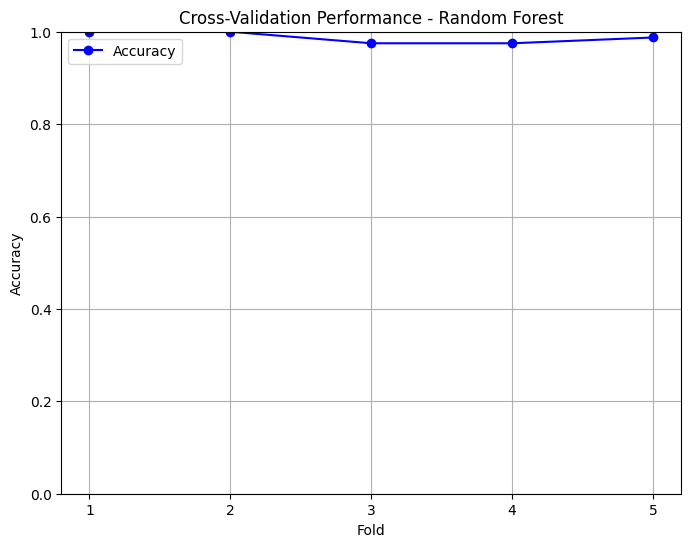

In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(ranfor, X, y, cv=cv, scoring=make_scorer(accuracy_score))
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Cross-Validation Performance - Random Forest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()


Logistic Regression

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_l = LogisticRegression()
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(f"Classification Report:\n{report}")

[[26  0]
 [ 0 14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [53]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Logistic Regression accuracy:",accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Logistic Regression accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg,X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.99 (+/- 0.04)


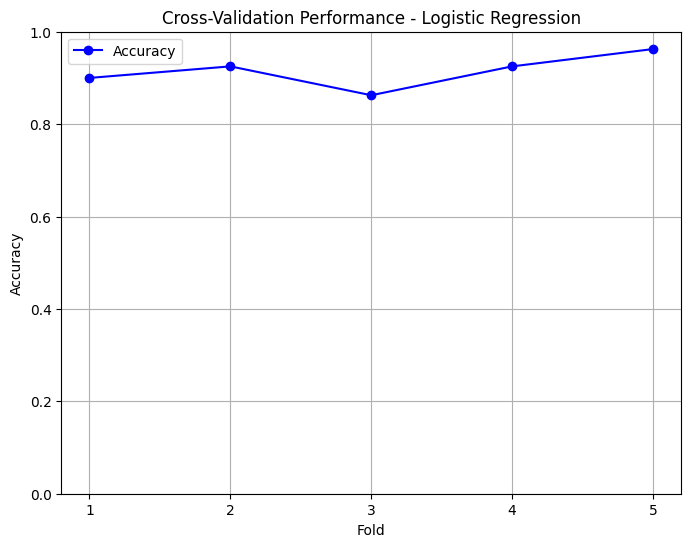

In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(logreg, X, y, cv=cv, scoring=make_scorer(accuracy_score))
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Cross-Validation Performance - Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()


Support Vector Machine


In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svm=SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[26  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [57]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine accuracy:",accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_svm, average='weighted'))

Support Vector Machine accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [58]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm,X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.97 (+/- 0.05)


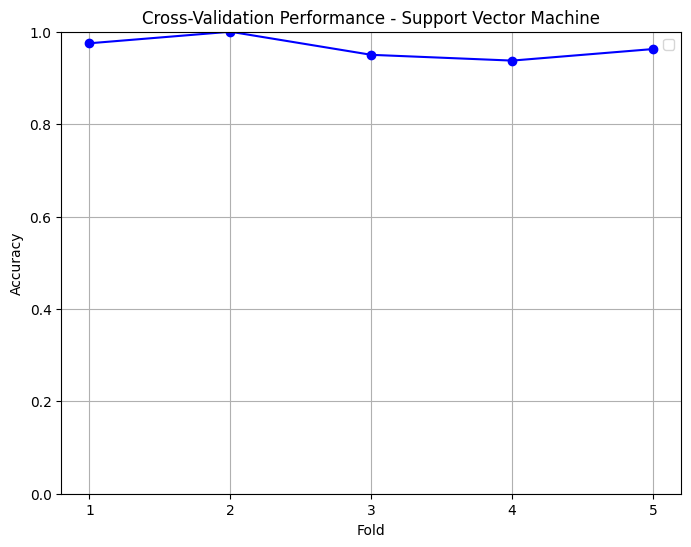

In [59]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm, X, y, cv=cv, scoring=make_scorer(accuracy_score))
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Performance - Support Vector Machine')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()

Chi-Square

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
k_best = SelectKBest(chi2, k='all')
X_chi2 = k_best.fit_transform(X_train, y_train)
model_chi = RandomForestClassifier()
model_chi.fit(X_chi2, y_train)
X_test_chi2 = k_best.transform(X_test)
y_pred = model_chi.predict(X_test_chi2)
chi_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52  0]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [61]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Chi-Square accuracy:",accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Chi-Square accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming X and y are already defined
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
classifier = RandomForestClassifier()

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_best = SelectKBest(chi2, k='all')

# Perform a single cross-validation iteration
train_index, test_index = next(skf.split(X_encoded, y))
X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
X_train_chi2 = k_best.fit_transform(X_train, y_train)
classifier.fit(X_train_chi2, y_train)
X_test_chi2 = k_best.transform(X_test)
y_pred = classifier.predict(X_test_chi2)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy for this single cross-validation iteration
print(" cross validation Accuracy:", accuracy)


 cross validation Accuracy: 0.9875


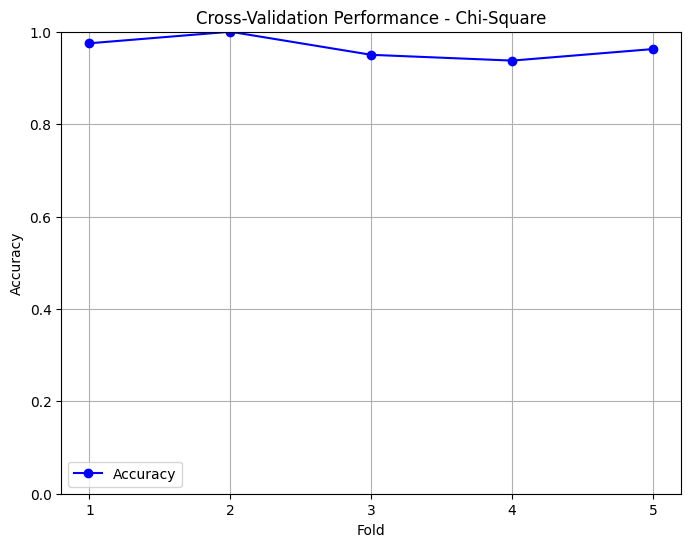

In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import make_scorer, accuracy_score
# cross-validation strategy (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm, X, y, cv=cv, scoring=make_scorer(accuracy_score))
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Cross-Validation Performance - Chi-Square')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()

KNN

In [64]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\python312\lib\site-packages (1.5.2)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k_value = 5
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_acc= accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


[[49  1]
 [ 0 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [66]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("knn accuracy:",accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

knn accuracy: 0.9875
Precision: 0.9879032258064516
Recall: 0.9875
F1-score: 0.9875393277032621


In [67]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are already defined
k_value = 5  # Value of k for KNN
fold_index = 5  # Index of the fold you want to select (0-based)

knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use next() to select the desired fold without a for loop
train_index, test_index = next(k_fold.split(X))

# Select the desired fold using the fold_index
for i in range(fold_index):
    train_index, test_index = next(k_fold.split(X))

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit classifier and calculate accuracy
knn_classifier.fit(X_train_scaled, y_train)
accuracy = knn_classifier.score(X_test_scaled, y_test)

# Print accuracy for the selected fold
print(f'Accuracy for Fold {fold_index}: {accuracy:.2f}')


Accuracy for Fold 5: 0.96


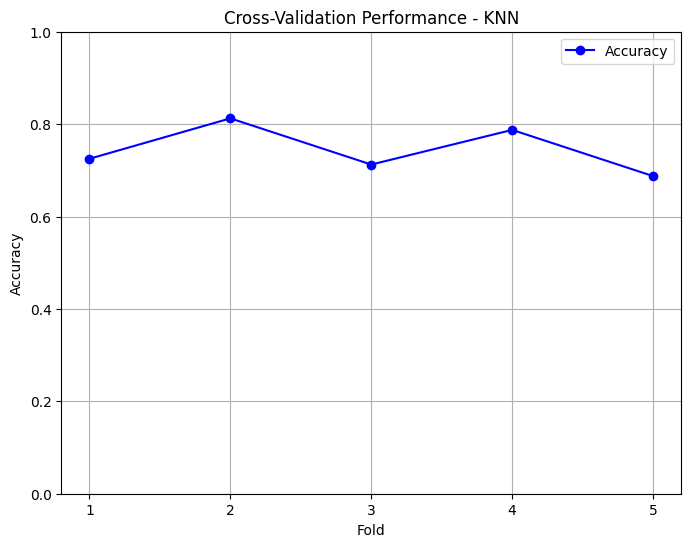

In [68]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import make_scorer, accuracy_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(knn_classifier, X, y, cv=k_fold, scoring='accuracy')
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Cross-Validation Performance - KNN')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.legend()
plt.grid(True)
plt.show()

XG-BOOST

In [69]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\python312\lib\site-packages (2.1.3)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
xg_acc= accuracy_score(y_test, y_pred)

print(f"Accuracy: {xg_acc * 100:.2f}%")
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 98.75%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [71]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("xgboost  accuracy:",accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

xgboost  accuracy: 0.9875
Precision: 0.9879310344827588
Recall: 0.9875
F1-score: 0.9875489695111564


In [72]:

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import xgboost as xgb

k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy = {accuracy * 100:.2f}%")
full_dataset_pred = model.predict(X)
full_dataset_accuracy = accuracy_score(y, full_dataset_pred)
print(f"\nOverall Accuracy on Full Dataset: {full_dataset_accuracy * 100:.2f}%")


Fold 1: Accuracy = 97.50%
Fold 2: Accuracy = 100.00%
Fold 3: Accuracy = 100.00%
Fold 4: Accuracy = 97.50%
Fold 5: Accuracy = 100.00%
Fold 6: Accuracy = 100.00%
Fold 7: Accuracy = 100.00%
Fold 8: Accuracy = 100.00%
Fold 9: Accuracy = 92.50%
Fold 10: Accuracy = 100.00%

Overall Accuracy on Full Dataset: 100.00%


In [73]:
import pandas as pd

# Assuming you have calculated accuracy scores for each model
dt_acc = 0.98
rfc_acc = 0.98
lr_acc = 0.99
svm_acc = 0.98
chi_acc = 0.98
knn_acc = 0.99
xg_acc = 0.99

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Support Vector Machine', 'Chi-Square', 'KNN', 'XG-BOOST'],
    'Score': [dt_acc, rfc_acc, lr_acc, svm_acc, chi_acc, knn_acc, xg_acc]
})

# Sorting the DataFrame by the 'Score' column in descending order
sorted_models = models.sort_values(by='Score', ascending=False)

print(sorted_models)


                    Model  Score
2     Logistic Regression   0.99
5                     KNN   0.99
6                XG-BOOST   0.99
1           Random Forest   0.98
0           Decision Tree   0.98
4              Chi-Square   0.98
3  Support Vector Machine   0.98


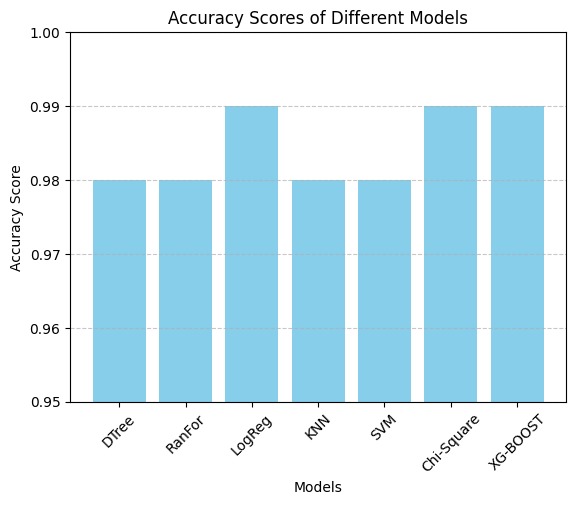

In [74]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
acc = [0.98, 0.98, 0.99, 0.98, 0.98, 0.99, 0.99]

# Models
models = ['DTree', 'RanFor', 'LogReg', 'KNN', 'SVM', 'Chi-Square', 'XG-BOOST']

# Plotting
plt.bar(models, acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.95, 1.0)  # Setting y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()


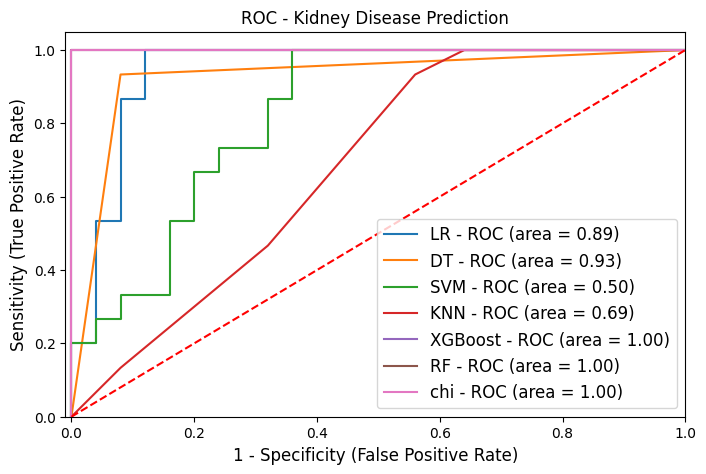

In [75]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Define your models
model_l = LogisticRegression()
dct = DecisionTreeClassifier()
svm = SVC(probability=True)  # Enable probability estimates for SVM
knn_model = KNeighborsClassifier()
rfc = RandomForestClassifier()
model = XGBClassifier()

# Define models for plotting
models = [
    {'label': 'LR', 'model': model_l},
    {'label': 'DT', 'model': dct},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn_model},
    {'label': 'XGBoost', 'model': model},
    {'label': 'RF', 'model': rfc},
    {'label':'chi','model': model_chi},
]

plt.figure(figsize=(8, 5))

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


In [76]:
import pickle
filename = 'Kidney.pkl'
pickle.dump(model_l, open(filename, 'wb'))